In [46]:
#importing libraries 

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [47]:
# checking the current version of the lib
pd.__version__

'1.1.5'

In [48]:
'''
  Our file is Air n B new york records , is saved in csv format, we can read it with pandas.read_csv

  # can downloaded from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
'''

df = pd.read_csv('AB_NYC_2019.csv')

In [49]:
# we saved the data as df, we can check how the data looks like by usind head()
df.head(7)  

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


## **From  text our data we can say :**

---




1.   how many different room types 

2.   how much is the price per night ( max , and min ) ?

3.   how many times in a month that room is used 

4.    what was the last time they give the service

5.   what are the  neighbourhood






Before we start answering the questions , I would like to know how big our data, do we have any null , missing , wrong formatted data

In [50]:
#how big the data
df.shape

(48895, 16)

In [51]:
# checking if there any null values in the dataset

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Reviews_per_month and last reviews has 100052 null values , in this case we can just drop those columns 

In [52]:
# dropping the null  values 

df = df.dropna()

df.isnull().sum()



id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [53]:
# quick over data types of the columsn

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

if we look at the data, last_review columns is actually is a date , so we need to convert object to date object


In [54]:
# last_review  daata type is  object   which is  ?   \

df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [55]:
# converting the columsn data type to datetime

df['last_review'] = pd.to_datetime(df.last_review)



In [56]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [57]:
# what are the columsn name  

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

I would like to work on [room_type, price, minimum nights number of reviews , last reviewss 

In [58]:
df = df.drop(
    ['id','name','host_id','host_name','name','host_id','neighbourhood',
     'minimum_nights','calculated_host_listings_count','longitude',
     'availability_365'],axis = 1)



In [59]:

df.head()

,neighbourhood_group,latitude,room_type,price,number_of_reviews,last_review,reviews_per_month
0,Brooklyn,40.64749,Private room,149,9,2018-10-19,0.21
1,Manhattan,40.75362,Entire home/apt,225,45,2019-05-21,0.38
3,Brooklyn,40.68514,Entire home/apt,89,270,2019-07-05,4.64
4,Manhattan,40.79851,Entire home/apt,80,9,2018-11-19,0.10
5,Manhattan,40.74767,Entire home/apt,200,74,2019-06-22,0.59


In [61]:
#another way of getting the columns, instead of using drop method 

df = df[['neighbourhood_group','room_type','price','number_of_reviews']]

We can check type of the rooms  avaliable  by using unique method


In [62]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

We have 4 different option to rent,


1.   Private room

2.   Shared room

3.   Entire hoom




In [63]:
# what is the max and min prices 

max  = df['price'].max()
min  = df['price'].min()

print("room prices start from {} to all the way  {}".format(min,max))




room prices start from 0 to all the way  10000


price is 0 bottom line might be wrong 

In [64]:
df[df['price'] == 0]

,neighbourhood_group,room_type,price,number_of_reviews
23161,Brooklyn,Private room,0,1
25433,Bronx,Private room,0,55
25634,Brooklyn,Private room,0,16
25753,Brooklyn,Private room,0,12
25778,Brooklyn,Entire home/apt,0,3
25794,Brooklyn,Private room,0,93
25795,Brooklyn,Private room,0,95
25796,Brooklyn,Private room,0,95
26841,Brooklyn,Shared room,0,2
26866,Brooklyn,Shared room,0,5


In [65]:
#I am assuming that is wrong ? either they book and calceled  

df = df.drop(df[df.price == 0].index)

In [66]:
#what are the max , min values for each neightboorhoood

df.groupby('neighbourhood_group')['price'].agg({'max', 'min'})


,min,max
neighbourhood_group,,
Bronx,20,800
Brooklyn,10,10000
Manhattan,10,9999
Queens,10,10000
Staten Island,13,625


In [67]:
# changing the column name price to price per night

df = df.rename(columns={'price': 'price_per_night'})

In [68]:
df.head()

,neighbourhood_group,room_type,price_per_night,number_of_reviews
0,Brooklyn,Private room,149,9
1,Manhattan,Entire home/apt,225,45
3,Brooklyn,Entire home/apt,89,270
4,Manhattan,Entire home/apt,80,9
5,Manhattan,Entire home/apt,200,74


Change the order of columns 


In [70]:

df = df[['neighbourhood_group','price_per_night', 'room_type','number_of_reviews']]

In [71]:
df.head()

,neighbourhood_group,price_per_night,room_type,number_of_reviews
0,Brooklyn,149,Private room,9
1,Manhattan,225,Entire home/apt,45
3,Brooklyn,89,Entire home/apt,270
4,Manhattan,80,Entire home/apt,9
5,Manhattan,200,Entire home/apt,74


Each location we have price and number of reviews, At index 0  per night is $149 and  reviews are 9 times,so the estimated revenue will be  9 X 149 

In [72]:
df['estimated_revenue'] = df.price_per_night * df.number_of_reviews

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df.head()

,neighbourhood_group,price_per_night,room_type,number_of_reviews,estimated_revenue
0,Brooklyn,149,Private room,9,1341
1,Manhattan,225,Entire home/apt,45,10125
3,Brooklyn,89,Entire home/apt,270,24030
4,Manhattan,80,Entire home/apt,9,720
5,Manhattan,200,Entire home/apt,74,14800


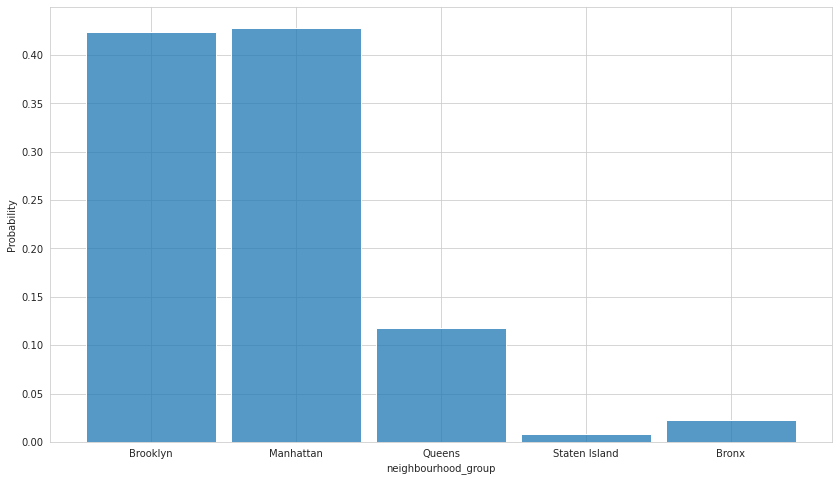

In [74]:
# graping the data by usin seaborn library
f, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")



sns.histplot(data = df,x='neighbourhood_group',
             
             shrink=.9, # LEAVING SPACE IN EVERY HUE
             stat="probability", # PERCENTAGE
             ax=ax )



<Figure size 1440x360 with 0 Axes>

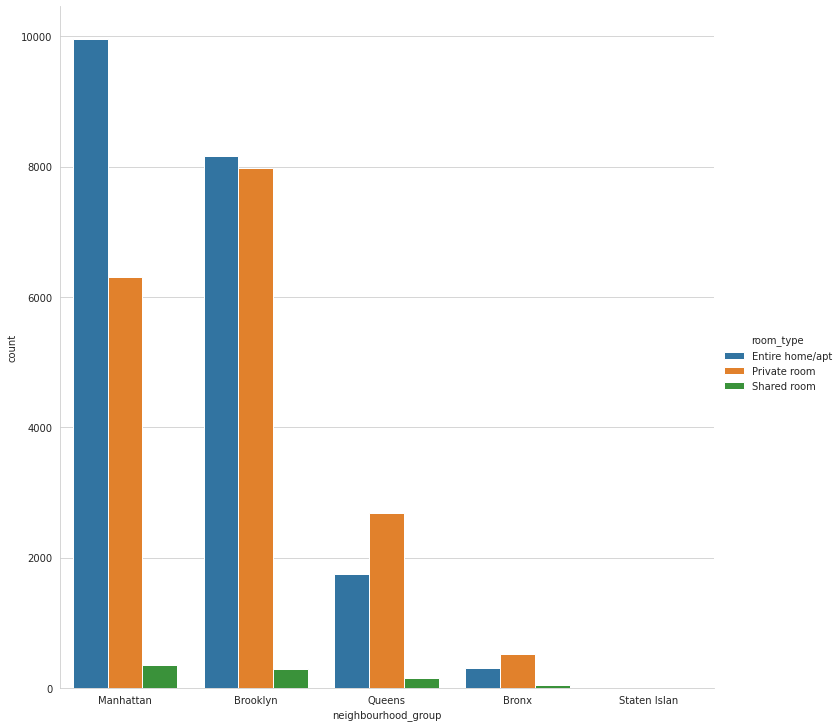

In [75]:
plt.figure(figsize=(20,5))
class_order = ['Manhattan','Brooklyn','Queens', 'Bronx','Staten Islan'] 
hue_order = ['Entire home/apt', 'Private room', 'Shared room']
sns.catplot(data=df, kind='count', 
            x='neighbourhood_group',
            hue='room_type',
            order = class_order, 
            hue_order = hue_order,
            height=10, # make the plot 5 units high
            aspect=1
                   )




Over all mostly usuer lesss likely to rent shared room than private or entire home

1. Manhatton (44.17%) and Brooklyn(39.57%) are where most of the servece provided   


2.   There is not much service in Staten Islan (0.76 %


In [76]:
  revenue_values = df.groupby('neighbourhood_group')['estimated_revenue'].agg({'sum', 'count'})

In [77]:

revenue_values

,count,sum
neighbourhood_group,,
Bronx,874,2178614
Brooklyn,16430,58818703
Manhattan,16621,73063666
Queens,4572,13596881
Staten Island,314,948078


In [78]:
 
revenue_values['revenue_percentage'] = revenue_values['sum'].div(revenue_values['sum'].sum()).multiply(100)

revenue_values['count_percentage'] =  revenue_values['count'].div(revenue_values['count'].sum()).multiply(100)

revenue_values.sort_values(by=['revenue_percentage'], ascending=False)




,count,sum,revenue_percentage,count_percentage
neighbourhood_group,,,,
Manhattan,16621,73063666,49.166046,42.825488
Brooklyn,16430,58818703,39.580317,42.333359
Queens,4572,13596881,9.149621,11.780165
Bronx,874,2178614,1.466034,2.251939
Staten Island,314,948078,0.637981,0.809049


([<matplotlib.patches.Wedge at 0x7fbb8ed8f908>,
 [Text(-0.050644594597252096, 1.0988335292655027, 'Bronx'),
  Text(-1.0697067342962048, 0.2563737556797672, 'Brooklyn'),
  Text(0.9147843518888374, -0.6108760836203361, 'Manhattan'),
  Text(0.35387563203498734, 1.0415239013348847, 'Queens'),
  Text(0.024050242750383883, 1.199758969886722, 'Staten Island')],
 [Text(-0.02762432432577387, 0.5993637432357286, '1.5%'),
  Text(-0.5834764005252026, 0.1398402303707821, '39.6%'),
  Text(0.4989732828484567, -0.33320513652018324, '49.2%'),
  Text(0.19302307201908397, 0.5681039461826642, '9.1%'),
  Text(0.014029308271057264, 0.6998593991005877, '0.6%')])

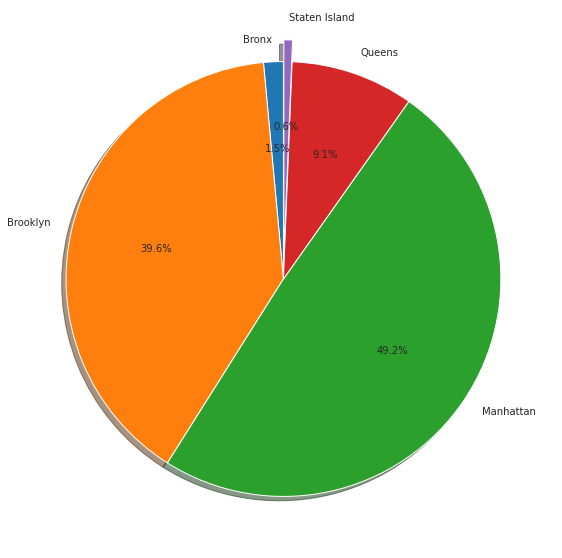

In [79]:
plt.figure(figsize=(10,10))

plt.pie(revenue_values['sum'],explode=(0,0,0,0,0.1),
        labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%')